In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
mouse_plank = pd.read_csv("mouse_plank.csv")

In [13]:
mouse_plank.head()

,Mouse ID,Date,Trial,Transit Time (s),Footfall Errors,Notes
0,6566,1/24/23,1,142,8,NaN
1,6570,1/24/23,1,91,0,NaN
2,6570,1/27/23,2,19,0,NaN
3,6570,1/27/23,3,120,6,mouse ends up at the start
4,6572,1/27/23,1,129,24,NaN


In [16]:
mouse_plank[["Transit Time (s)", "Footfall Errors"]].describe()

,Transit Time (s),Footfall Errors
count,58.000000,58.000000
mean,49.034483,3.568966
std,44.423783,3.996104
min,9.000000,0.000000
25%,18.250000,1.000000
50%,30.000000,2.000000
75%,67.500000,6.000000
max,194.000000,24.000000


Univariate Analysis

Text(13.819444444444445, 0.5, 'Count')

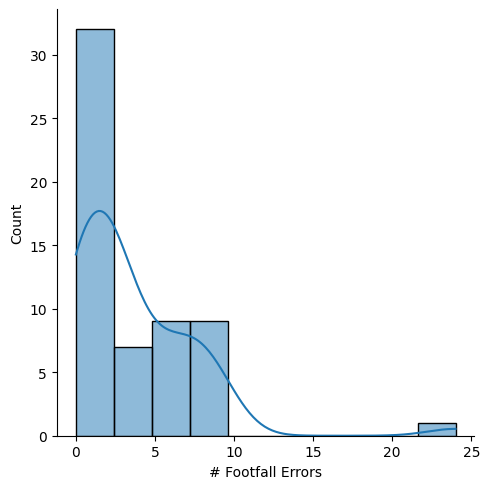

In [38]:
sns.displot(data = mouse_plank, x = "Footfall Errors", kde = True)
plt.xlabel("# Footfall Errors")
plt.ylabel("Count")

Text(13.819444444444445, 0.5, 'Count')

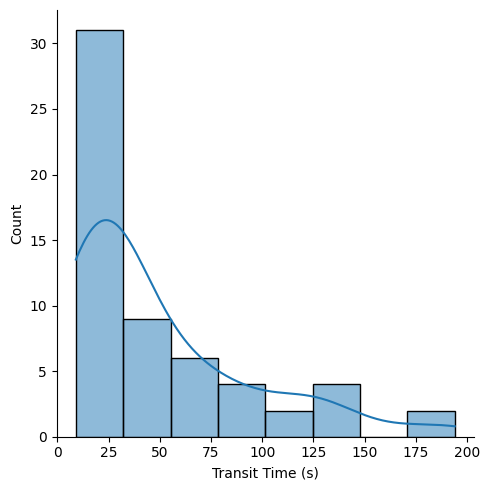

In [36]:
sns.displot(data = mouse_plank, x = "Transit Time (s)", kde = True)
plt.xlabel("Transit Time (s)")
plt.ylabel("Count")

Multivariate Analysis

Text(33.37500000000001, 0.5, 'Footfall Errors')

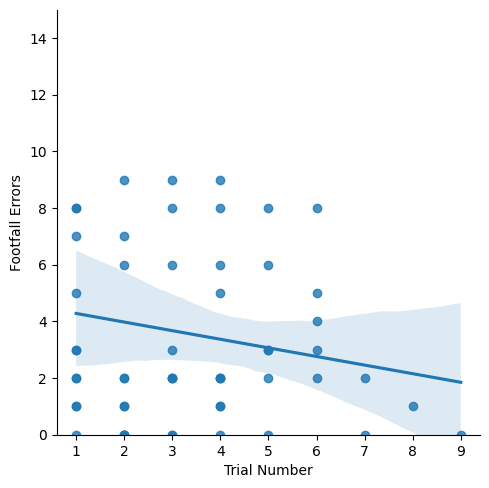

In [43]:
#plt.scatter(mouse_plank["Trial"], mouse_plank["Footfall Errors"])
sns.lmplot(x = "Trial", y="Footfall Errors", data=mouse_plank)
plt.ylim(0, 15)
plt.xlabel("Trial Number")
plt.ylabel("Footfall Errors")

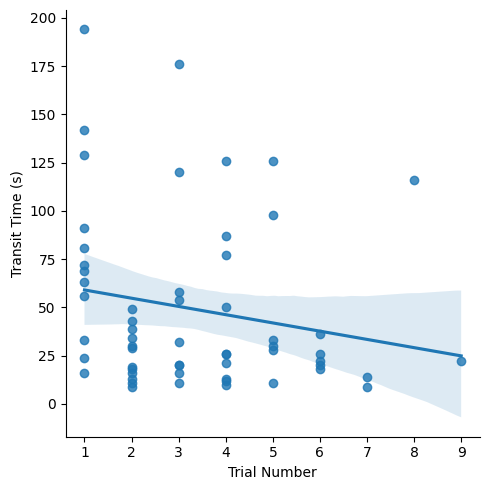

In [41]:
# plt.scatter(mouse_plank["Trial"], mouse_plank["Transit Time (s)"])
sns.lmplot(x = "Trial", y="Transit Time (s)", data=mouse_plank)
plt.xlabel("Trial Number")
plt.ylabel("Transit Time (s)")
plt.show()

(0.0, 100.0)

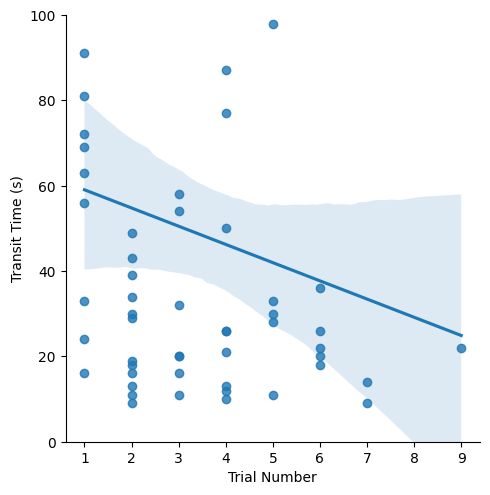

In [42]:
#plt.scatter(mouse_plank["Trial"], mouse_plank["Transit Time (s)"])
sns.lmplot(x = "Trial", y="Transit Time (s)", data=mouse_plank)
plt.xlabel("Trial Number")
plt.ylabel("Transit Time (s)")

# Focus on transit times under 100 seconds
plt.ylim(0, 100)

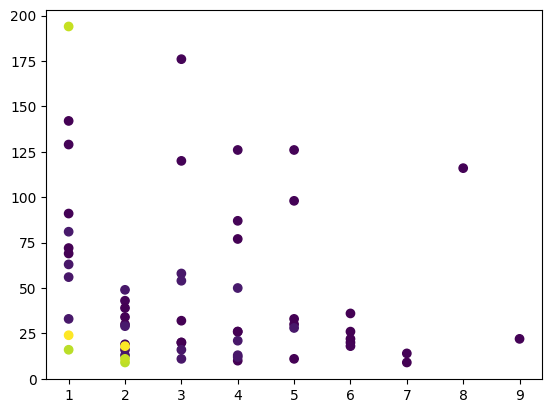

In [66]:
plt.scatter(mouse_plank["Trial"], mouse_plank["Transit Time (s)"], 
            c = mouse_plank["Mouse ID"], cmap = "viridis")

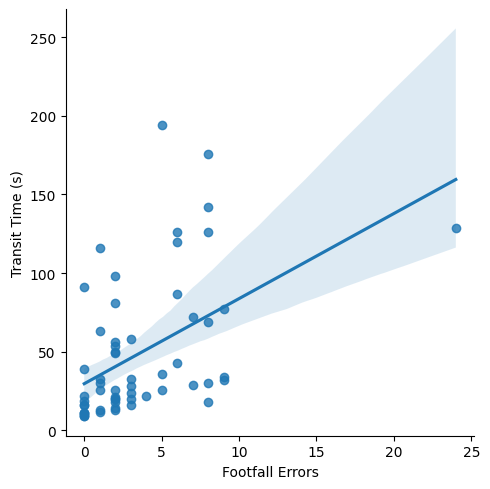

In [67]:
sns.lmplot(x = "Footfall Errors", y="Transit Time (s)", data=mouse_plank)

(0.0, 15.0)

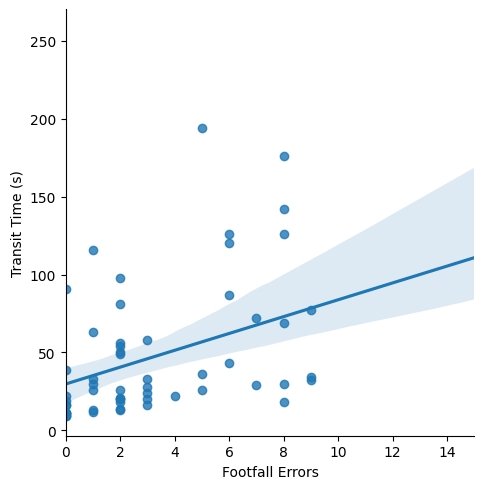

In [70]:
sns.lmplot(x = "Footfall Errors", y="Transit Time (s)", data=mouse_plank)
plt.xlim(0, 15)